<img src = "https://mma.prnewswire.com/media/1081554/CarbonCure_Technologies_High_tech__low_carbon_concrete_project_a.jpg?p=facebook">

### Concrete Strength Prediction<br>
Concrete has an extremely versatile use in construction due to its availability, flexibility of
handling, giving shape to any desired form and as such is the most widely used construction
material in use today.<br>
High-performance concrete (HPC) has been used in the concrete construction industry in recent years because of its demonstrated high strength. In addition to the four basic ingredients of conventional concrete, (i.e., portland cement, fine and coarse aggregates,and water), HPC includes supplementary cementitious materials (e.g., fly ash, blast-furnace slag, and chemical admixture such as superplasticizer) (Chang et al. 1996).<br>
Compressive strength of concrete is one of its most important engineering properties. Designing a concrete structure requires the concrete compressive strength to be used and Abrams was one of the pioneers to recognize the significance of concrete compressive strength and proposed to use water-to-cement ratio (w/c) to quantify its value.
Characteristic strength of the concrete is designated as the compressive
strength of a concrete sample that has been cured for 28 days and is determined by the
standard cylinder crushing test.
The recommended wait time for testing the cylinder is 28 days to ensure correct results. This consumes a lot of time and requires a lot of labour to prepare different prototypes and test them. Also, this method is prone to human error and one small mistake can cause the wait time to drastically increase.<br>
The conrete cube exhibits behavioral differences in their compressive strengths for cubes that are cured/not cured. Curing is the process of maintaining the moisture to ensure uninterrupted hydration of concrete.<br>
* The concrete strength increases if the concrete cubes are cured periodically. The rate of increase in strength is described here.

|Time|% Of Total Strength Achieved|
|---|---|
|1 day|16%|
|3 days|40%|
|7 days|65%|
|14 days|90%|
|28 days|99%|

* At 28 days, concrete achieves 99% of the strength. Thus usual measurements of strength are taken at 28 days. (Klieger, 1958),(Portland Cement Association web site, 2020)

### Scope of the Study
One way of reducing the wait time and reducing the number of combinations to try is to make use of digital simulations by applying Machine Learning Techniques, that is to Analyse a specific Concrete Compressive Strength Dataset and build Machine Learning models to predict the compressive strength for various quantities of constituent components as the input.<br>
Also all the developed ML algorythms/models will be compared and evaluated in order to conclude to the best one that will be further fine-tuned to give the best performance and maximum accuracy in ots predictions of the compressive strength of concrete.
#### Objective
Built the appropriate ML Model to predict the concrete strength using the Data available in the file "concrete.csv" and apply feature engineering and model tuning to obtain 80% to 95% of R2score.
#### The Dataset
The experimental data set was obtained from the University of California, Irvine (UCI), repository of data, donated on 2007 by Prof. I-Cheng Yeh that first collected and experiment with them (Yeh 1998).

In [89]:
#importing libraries

%matplotlib inline
import time
import random
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import seaborn
import seaborn as sns
import itertools

from scipy import stats
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.linear_model import RANSACRegressor, LinearRegression, TheilSenRegressor
from sklearn.metrics import (explained_variance_score, mean_absolute_error, 
mean_squared_error, median_absolute_error, r2_score)
from sklearn.svm import SVR
from sklearn.linear_model import Ridge,Lasso,ElasticNet,BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from IPython.display import Image
import warnings 
warnings.filterwarnings('ignore') 

In [29]:
#Reading the Data in the Memory
data = pd.read_csv('concrete.csv')

### EDA
#### Exploratory data quality report.
1. Univariate analysis – data types and description of the independent attributes which should include (name, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers, duplicates.

In [3]:
#Printing the Size of the Dataset and Printing the First Few Rows of the Dataset
print("Number of Rows :",len(data))
print("Number of columns :",data.shape[1])
data.head()

Number of Rows : 1030
Number of columns : 9


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [10]:
# Duplicated rows in the data set
data.duplicated().sum()

25

Dataset Description <br>
The dataset consists of 1030 instances with 9 attributes and has no missing (null) values. <br>
There are eight (8) independent-input variables (cement, slag, ash, water, superplastic, coarseagg, fineagg, age) and one (1)  dependent-output variable (strength).<br>
Seven (7) of the input variables are floating point numbers and represent the amount of raw material mixture (measured in kg/m³) and one integer variable, represents Age (in Days). <br>
The target variable is Concrete Compressive Strength measured in (MPa — Mega Pascal.<br>
We shall explore the data to see how input features are affecting compressive strength.

* Cement (cement) -- --------------quantitative -- kg in a m3 mixture -- Input Variable<br>
* Blast Furnace Slag (slag) -- ----quantitative -- kg in a m3 mixture -- Input Variable<br>
* Fly Ash (ash) -----------------------quantitative -- kg in a m3 mixture -- Input Variable<br>
* Water (water) -- --------------------quantitative -- kg in a m3 mixture -- Input Variable<br>
* Superplasticizer (superplastic) -quantitative -- kg in a m3 mixture -- Input Variable<br>
* Coarse Aggregate (coarseagg) -quantitative -- kg in a m3 mixture -- Input Variable<br>
* Fine Aggregate (fineagg) -- ------quantitative -- kg in a m3 mixture -- Input Variable<br>
* Age(age) -- ---------------------------quantitative -- Day (1~365) -- -------Input Variable<br>
* Concrete compressive strength(strength) quantitative - MPa -- ------Output Variable<br>

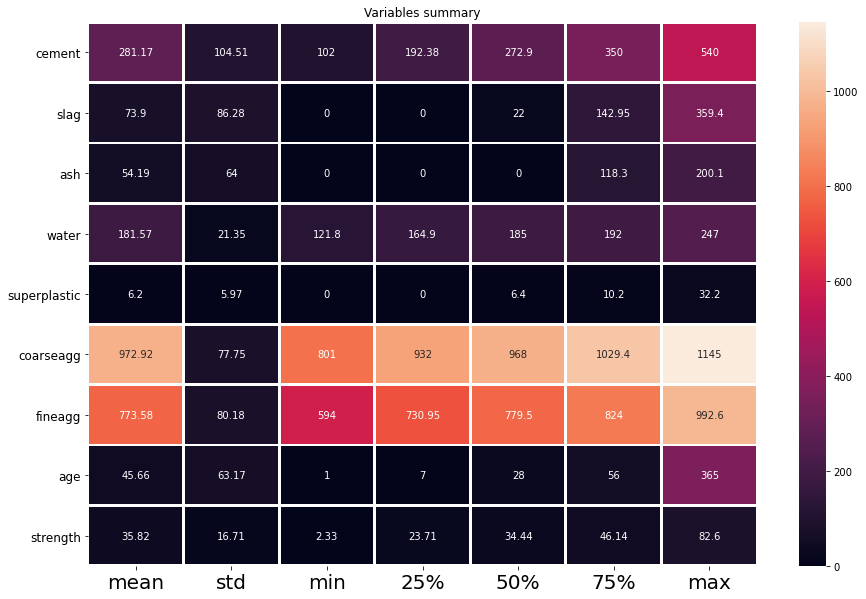

In [7]:
# Visulisation of Variables Summary
plt.figure(figsize=(15,10))
sns.heatmap(round(data.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="g")
plt.xticks(fontsize=20)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

Concrete Compressive Strength distribution (Output Variable)

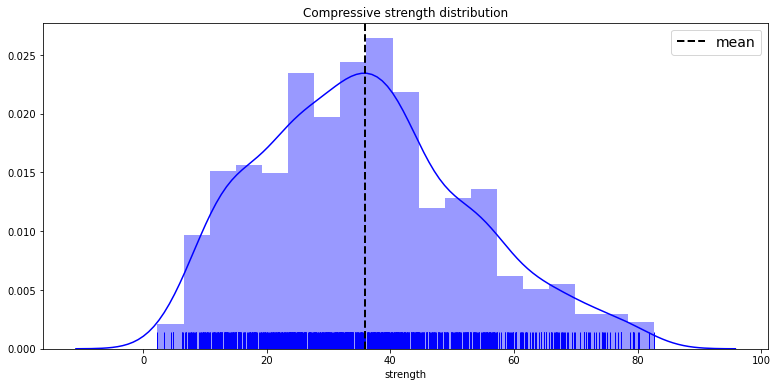

Skewness =  0.41697728841071807


In [11]:
plt.figure(figsize=(13,6))
sns.distplot(data["strength"],color="b",rug=True)
plt.axvline(data["strength"].mean(),
            linestyle="dashed",color="k",
            label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title("Compressive strength distribution")
plt.show()
print("Skewness = ",data['strength'].skew())

### Distribution of independent variables

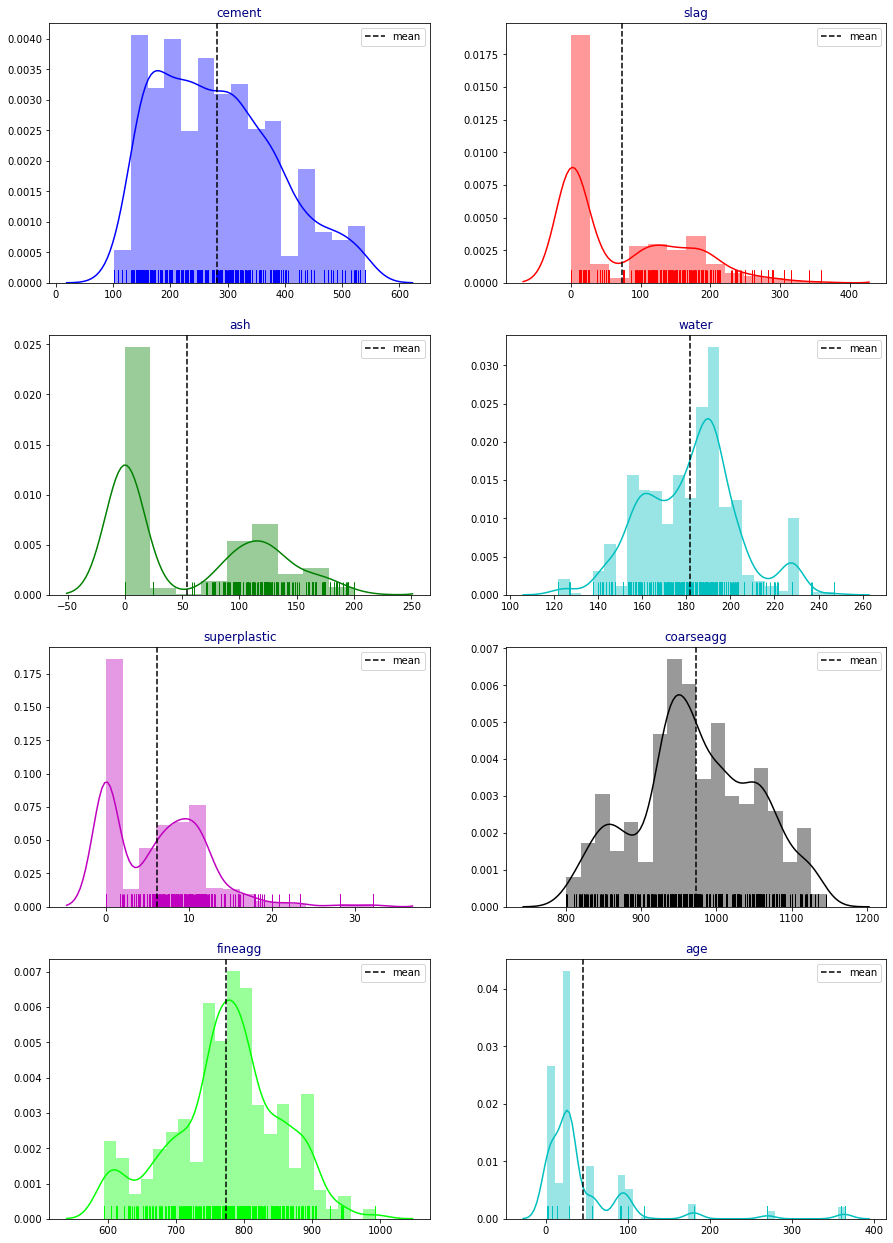

In [12]:
cols = [i for i in data.columns if i not in 'compressive_strength']
length = len(cols)
cs = ["b","r","g","c","m","k","lime","c"]
fig = plt.figure(figsize=(15,22))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(data[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(data[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

### Check variable "age" for fault values

In [62]:
data[data['age'] < 28].count

<bound method DataFrame.count of       cement    slag     ash   water  superplastic  coarseagg  fineagg  age  \
1    168.900  42.200 124.300 158.300        10.800   1080.800  796.200   14   
6    166.800 250.200   0.000 203.500         0.000    975.600  692.600    7   
11   173.000 116.000   0.000 192.000         0.000    946.800  856.800    3   
12   385.000   0.000   0.000 186.000         0.000    966.000  763.000   14   
13   237.500 237.500   0.000 228.000         0.000    932.000  594.000    7   
...      ...     ...     ...     ...           ...        ...      ...  ...   
1021 203.500 305.300   0.000 203.500         0.000    963.400  630.000    3   
1023 141.300 212.000   0.000 203.500         0.000    971.800  748.500    7   
1024 297.200   0.000 117.500 174.800         9.500   1022.800  753.500    3   
1026 531.300   0.000   0.000 141.800        28.200    852.100  893.700    3   
1029 540.000   0.000   0.000 173.000         0.000   1125.000  613.000    7   

      strength  
1

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.300,212.000,0.000,203.500,0.000,971.800,748.500,28,29.890
1,168.900,42.200,124.300,158.300,10.800,1080.800,796.200,14,23.510
2,250.000,0.000,95.700,187.400,5.500,956.900,861.200,28,29.220
3,266.000,114.000,0.000,228.000,0.000,932.000,670.000,28,45.850
4,154.800,183.400,0.000,193.300,9.100,1047.400,696.700,28,18.290
...,...,...,...,...,...,...,...,...,...
1024,297.200,0.000,117.500,174.800,9.500,1022.800,753.500,3,21.910
1025,135.000,0.000,166.000,180.000,10.000,961.000,805.000,28,13.290
1026,531.300,0.000,0.000,141.800,28.200,852.100,893.700,3,41.300
1027,276.400,116.000,90.300,179.600,8.900,870.100,768.300,28,44.280


### Age distribution in months

In [49]:
#Binning days to months
data_age=data.copy()
def label(data_age):
    if data_age["age"] <= 30:
        return "1 month"
    if data_age["age"] > 30 and data_age["age"] <= 60 :
        return "2 months"
    if data_age["age"] > 60 and data_age["age"] <= 90 :
        return "3 months"
    if data_age["age"] > 90 and data_age["age"] <= 120 :
        return "4 months"
    if data_age["age"] > 120 and data_age["age"] <= 150 :
        return "5 months"
    if data_age["age"] > 150 and data_age["age"] <= 180 :
        return "6 months"
    if data_age["age"] > 180 and data_age["age"] <= 210 :
        return "7 months"
    if data_age["age"] > 210 and data_age["age"] <= 240 :
        return "8 months"
    if data_age["age"] > 240 and data_age["age"] <= 270 :
        return "9 months"
    if data_age["age"] > 270 and data_age["age"] <= 300 :
        return "10 months"
    if data_age["age"] > 300 and data_age["age"] <= 330 :
        return "11 months"
    if data_age["age"] > 330 :
        return "12 months"
data_age["age_months"] = data_age.apply(lambda data_age:label(data_age) , axis=1)

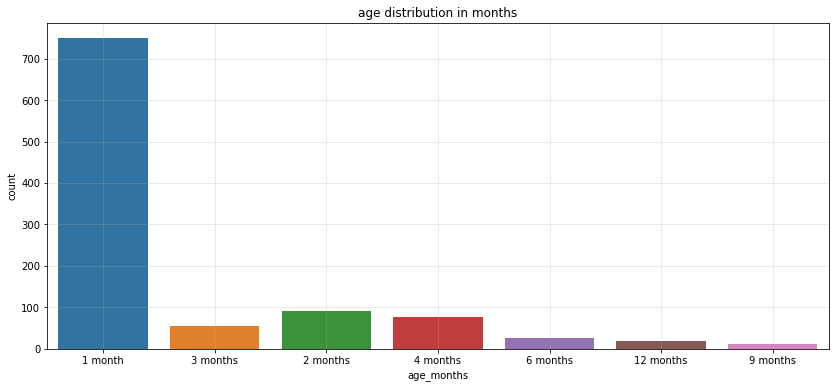

In [74]:
plt.figure(figsize=(14,6))
order = ['1 month','2 months', '3 months','4 months','6 months','9 months', '12 months']
ax = sns.countplot(data_age["age_months"])
plt.title("age distribution in months")
plt.grid(True,alpha=.3)
plt.show()

In [70]:
data[data['age'] < 30]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.300,212.000,0.000,203.500,0.000,971.800,748.500,28,29.890
1,168.900,42.200,124.300,158.300,10.800,1080.800,796.200,14,23.510
2,250.000,0.000,95.700,187.400,5.500,956.900,861.200,28,29.220
3,266.000,114.000,0.000,228.000,0.000,932.000,670.000,28,45.850
4,154.800,183.400,0.000,193.300,9.100,1047.400,696.700,28,18.290
...,...,...,...,...,...,...,...,...,...
1024,297.200,0.000,117.500,174.800,9.500,1022.800,753.500,3,21.910
1025,135.000,0.000,166.000,180.000,10.000,961.000,805.000,28,13.290
1026,531.300,0.000,0.000,141.800,28.200,852.100,893.700,3,41.300
1027,276.400,116.000,90.300,179.600,8.900,870.100,768.300,28,44.280


In [15]:
data.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

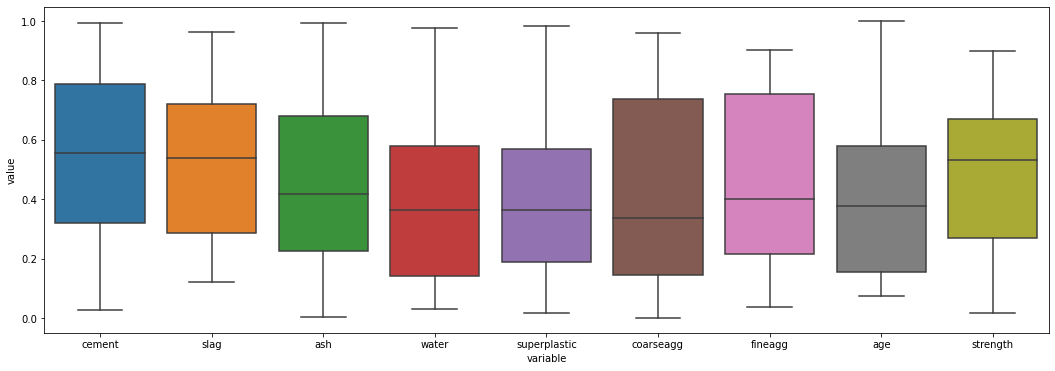

In [16]:
df = pd.DataFrame(data = np.random.random(size=(30,9)), columns = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'])
plt.figure(figsize=(18,6))
sns.boxplot(x="variable", y="value", data=pd.melt(df))

plt.show()

#### Surface plot of variables<br>
* X - Axis = columns encoded as [ coarse_agg : 1, fine_agg : 2 , cement : 3 , fly_ash : 4 , water : 5 , furnace_slag:6,super_plasticizer : 7 , compressive_strength : 8 , age : 9]
* Y - Axis = index.
* Z - Axis = values .

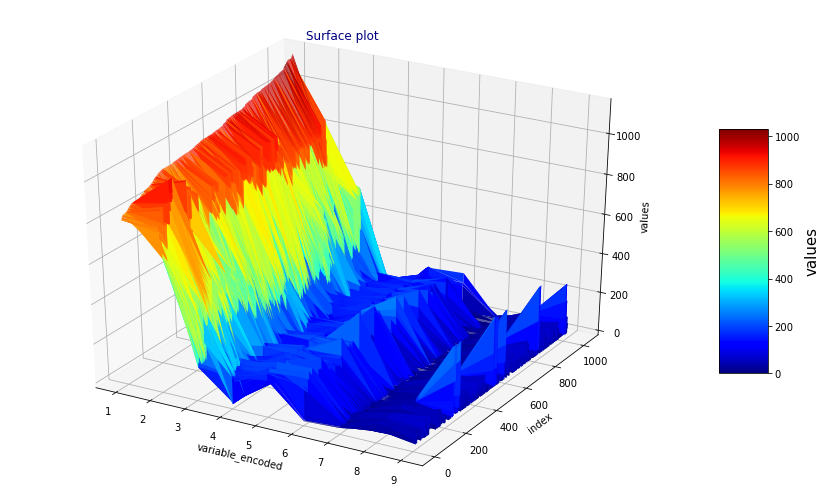

In [22]:
from mpl_toolkits.mplot3d import Axes3D
data1 = data.copy()

data1 = data1.sort_values(by=['coarseagg'],ascending=True).reset_index()

data1 = data1[['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength']] 

df = data1.unstack().reset_index()
df.columns = ["X","Y","Z"]


df["X"] = df["X"].map({'coarseagg':1, 'fineagg':2 , 
                       'cement':3, 'slag':6, 'ash':4,
                       'water':5, 'superplastic':7,
                        'age':9, 'strength':8})
 
fig = plt.figure(figsize=(15,9))

ax  = fig.gca(projection = "3d")

surf = ax.plot_trisurf(df["X"],df["Y"],df["Z"],cmap="jet",linewidth=2)
lab  = fig.colorbar(surf,shrink=.5,aspect=5)
lab.set_label("values",fontsize=15)

ax.set_xlabel("variable_encoded")
ax.set_ylabel("index")
ax.set_zlabel("values")

plt.title("Surface plot",color="navy")
plt.show()

In [6]:
#StatisticalSummary of the Dataset Variables
pd.options.display.float_format='{:.3f}'.format
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.000,281.168,104.506,102.000,192.375,272.900,350.000,540.000
slag,1030.000,73.896,86.279,0.000,0.000,22.000,142.950,359.400
ash,1030.000,54.188,63.997,0.000,0.000,0.000,118.300,200.100
water,1030.000,181.567,21.354,121.800,164.900,185.000,192.000,247.000
superplastic,1030.000,6.205,5.974,0.000,0.000,6.400,10.200,32.200
coarseagg,1030.000,972.919,77.754,801.000,932.000,968.000,1029.400,1145.000
fineagg,1030.000,773.580,80.176,594.000,730.950,779.500,824.000,992.600
age,1030.000,45.662,63.170,1.000,7.000,28.000,56.000,365.000
strength,1030.000,35.818,16.706,2.330,23.710,34.445,46.135,82.600


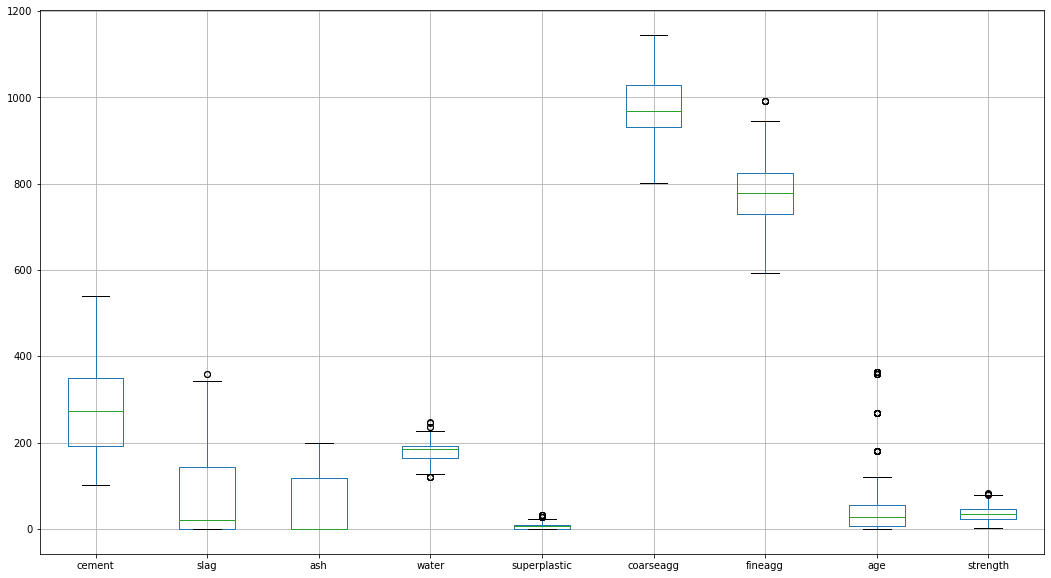

In [18]:
# Boxplot of Independent and Dependent Variable also to identify Variables with Outliers
plt.figure(figsize=(18,10))
data.boxplot()
plt.show()

### Observations 1.
* The target variable has the distribution of data to be almost normal, but with lesser values on higher range, / higher values on lesser range. It is positively, lightly skewed, as the skew value is < 0.42 <br>
* All features except age and strength have same units(kg in m3 mixture) but have different scales.<br> Thus we might need to scale the data so as to avoid bias in algorithms
* Cement: Distribution of cement appears nearly normal <br>
the range of this attribute is 102 (min) to 540 (max). The mean (281.16) and median (272.90) values differ slightly. The standard deviation value is quite high (104.50). For 75% of the given observations, this value is less than 350 (3rd quartile).
* Slag: the range of this attribute is 0 (min) to 359.40 (max). The mean (73.89) and median (22) values differ significantly indicating skewness of the distribution. The standard deviation value is 86.27. For 25% of the given observations, this value is 0..! (1st quartile).
* Ash: the range of this attribute is 0 (min) to 200 (max). Difference between the mean (54.18) and median (0) values is very high. The standard deviation value (64) is also high. For 50% of the given observations, this value is 0..! (2nd quartile). This attribute seems to have highly skewed distribution.
* Water: the range of this attribute is 121.8 (min) to 247 (max). The mean (181.56) and median (185) values differ slightly. The standard deviation value is 21.35. For 75% of the given observations, this value is 192 (3rd quartile). This attribute seems to have normal distribution.
* Superplastic: the range of this attribute is 0 (min) to 32.20 (max). Difference between the mean (620) and median (6.40) values is negligible. The standard deviation value is almost 6. For 25% of the given observations, this value is 0..! (1st quartile). 
* Coarseagg: the range of this attribute is 801 (min) to 1145 (max). The mean (aprox. 973) and median (968) values differ slightly. The standard deviation value is 77.75. For 75% of the given observations, this value is 1029 (3rd quartile). 
* Fineagg: the range of this attribute is 594 (min) to 992 (max). The mean (aprox. 773) and median (779) values differ slightly. The standard deviation value is 80.17. For 25% of the given observations, this value is 731 (1st quartile).
* Age: the range of this attribute is 1 (min) to 365 (max) days. The mean (approx. 46) and median (28) values differ significantly. The standard deviation value is approx 63 which is quite high. For 75% of the given observations, this value is 56 days (3rd quartile). This attribute seems to have skewed distribution.

#### Observations 2

* Slag and ash, age has wide difference in mean and 50% values,indicating mean > median, so being a right tailed skewness in data. <br>
* Also, slag, ash and superplastic has min value 0, which cannot be in the composition of cement. <br>
* In col Water , std is < min value, should we consider this variable for further investigation (analysis)<br>

* Age column appears to be having maximum number of outliers. It also has long tail which confirms the presence of outliers<br>
* Slag, Water, superplastic, fineagg features have some outliers<br>
* Other columns has very little diff b/w ( Q1,median ) and (Q3 and median), so there are few outliers <br>


#### Further Analysis of Outliers

In [30]:
# Count outliers
q1= data.quantile(0.25)
q3= data.quantile(0.75)
IQR = q3-q1
outliers = pd.DataFrame(((data > (q3+1.5*IQR)) | (data < (q1-IQR*1.5))).sum(axis=0), columns=['No. of outliers'])
outliers['Percentage of outliers'] = round(outliers['No. of outliers']*100/len(data), 2)
outliers

,No. of outliers,Percentage of outliers
cement,0,0.000
slag,2,0.190
ash,0,0.000
water,9,0.870
superplastic,10,0.970
coarseagg,0,0.000
fineagg,5,0.490
age,59,5.730
strength,4,0.390


In [34]:
# Define the outliers in Age
Q1=data['age'].quantile(q=0.25)
Q3=data['age'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in age: ', L_outliers)
print('Upper outliers in age: ', U_outliers)
print('Number of outliers in age upper : ', data[data['age']>129.5]['age'].count())
print('Number of outliers in age lower : ', data[data['age']<-66.5]['age'].count())
print('% of Outlier in age upper: ',round(data[data['age']>129.5]['age'].count()*100/len(data)), '%')
print('% of Outlier in age lower: ',round(data[data['age']<-66.5]['age'].count()*100/len(data)), '%')

Lower outliers in age:  -66.5
Upper outliers in age:  129.5
Number of outliers in age upper :  59
Number of outliers in age lower :  0
% of Outlier in age upper:  6.0 %
% of Outlier in age lower:  0.0 %


In [23]:
# Define the outliers in Slag
Q1=data['slag'].quantile(q=0.25)
Q3=data['slag'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in slag: ', L_outliers)
print('Upper outliers in slag: ', U_outliers)
print('Number of outliers in slag upper : ', data[data['slag']>357.375]['slag'].count())
print('Number of outliers in slag lower : ', data[data['slag']<-214.425]['slag'].count())
print('% of Outlier in slag upper: ',round(data[data['slag']>357.375]['slag'].count()*100/len(data)), '%')
print('% of Outlier in slag lower: ',round(data[data['slag']<-214.425]['slag'].count()*100/len(data)), '%')

Lower outliers in slag:  -214.42499999999998
Upper outliers in slag:  357.375
Number of outliers in slag upper :  2
Number of outliers in slag lower :  0
% of Outlier in slag upper:  0.0 %
% of Outlier in slag lower:  0.0 %


In [35]:
# Define the outliers in Water
Q1=data['water'].quantile(q=0.25)
Q3=data['water'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in water: ', L_outliers)
print('Upper outliers in water: ', U_outliers)
print('Number of outliers in water upper : ', data[data['water']>232.649]['water'].count())
print('Number of outliers in water lower : ', data[data['water']<124.25]['water'].count())
print('% of Outlier in water upper: ',round(data[data['water']>232.649]['water'].count()*100/len(data)), '%')
print('% of Outlier in water lower: ',round(data[data['water']<124.25]['water'].count()*100/len(data)), '%')

Lower outliers in water:  124.25000000000001
Upper outliers in water:  232.64999999999998
Number of outliers in water upper :  4
Number of outliers in water lower :  5
% of Outlier in water upper:  0.0 %
% of Outlier in water lower:  0.0 %


In [36]:
# Define the outliers in superplastic
Q1=data['superplastic'].quantile(q=0.25)
Q3=data['superplastic'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in superplastic: ', L_outliers)
print('Upper outliers in superplastic: ', U_outliers)
print('Number of outliers in superplastic upper : ', data[data['superplastic']>25.5]['superplastic'].count())
print('Number of outliers in superplastic lower : ', data[data['superplastic']<-15.299]['superplastic'].count())
print('% of Outlier in superplastic upper: ',round(data[data['superplastic']>25.5]['superplastic'].count()*100/len(data)), '%')
print('% of Outlier in superplastic lower: ',round(data[data['superplastic']<-15.299]['superplastic'].count()*100/len(data)), '%')

Lower outliers in superplastic:  -15.299999999999999
Upper outliers in superplastic:  25.5
Number of outliers in superplastic upper :  10
Number of outliers in superplastic lower :  0
% of Outlier in superplastic upper:  1.0 %
% of Outlier in superplastic lower:  0.0 %


#### Exploratory data quality report
2. Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves.

In [37]:
data.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

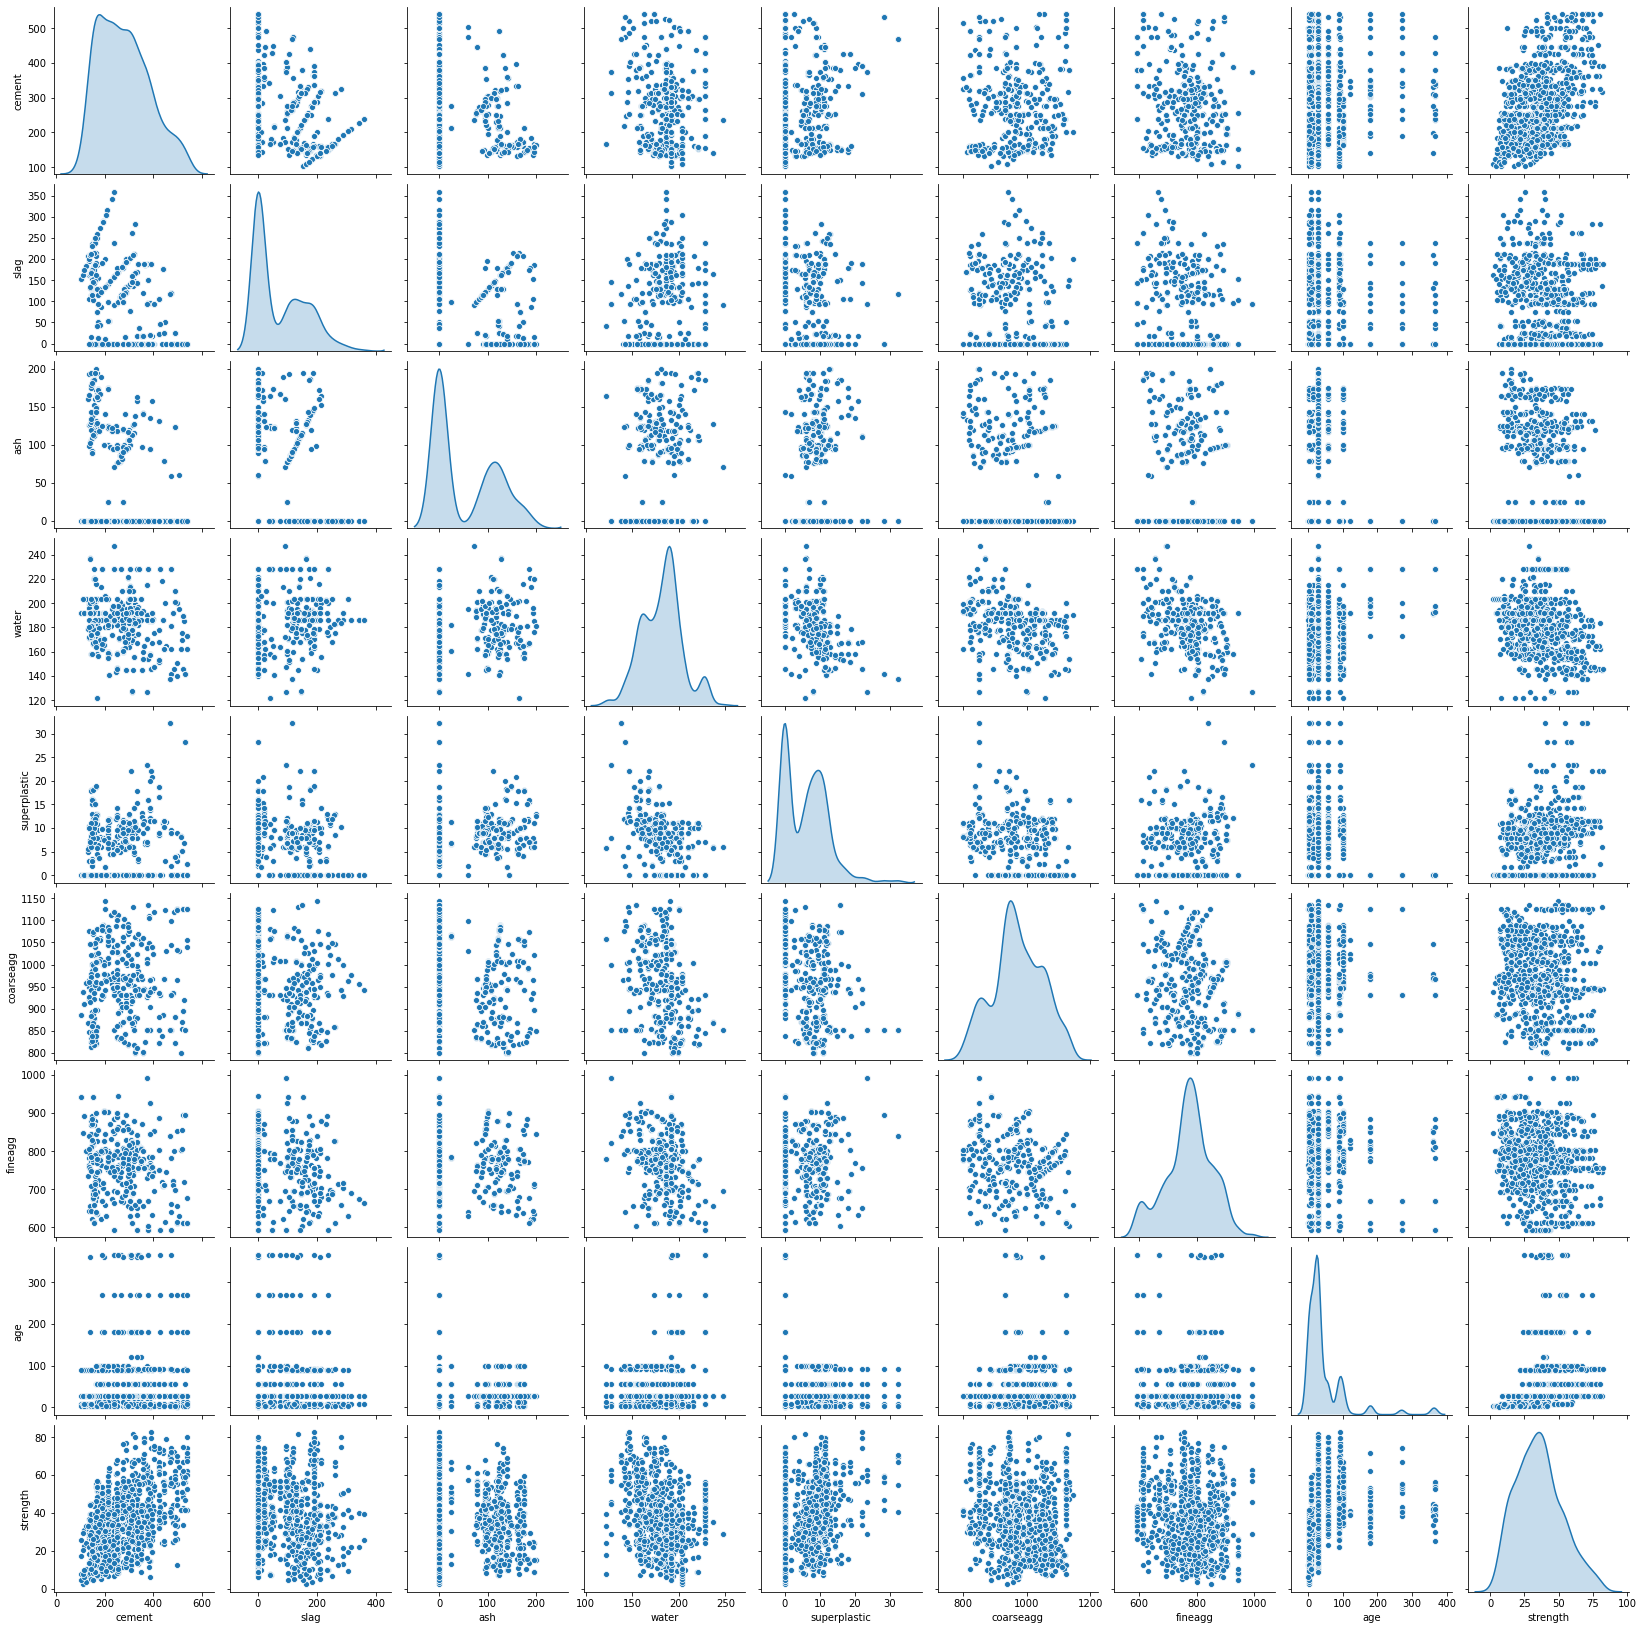

In [38]:
sns.pairplot(data, diag_kind='kde')

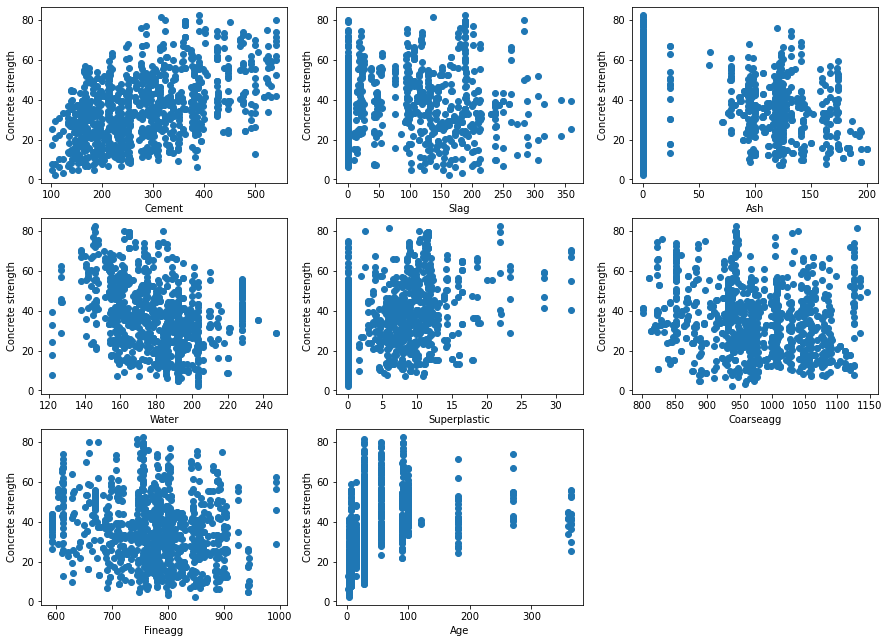

In [40]:
# Scatter plot between response variable (stregth) and exploratory variables
plt.figure(figsize=(15,11))
plot_count = 1
for feature in list(data.columns)[:-1]:
 plt.subplot(3,3,plot_count)
 plt.scatter(data[feature], data['strength'])
 plt.xlabel(feature.replace('_',' ').title())
 plt.ylabel('Concrete strength')
 plot_count+=1
plt.show()

#### Compressive strength by months

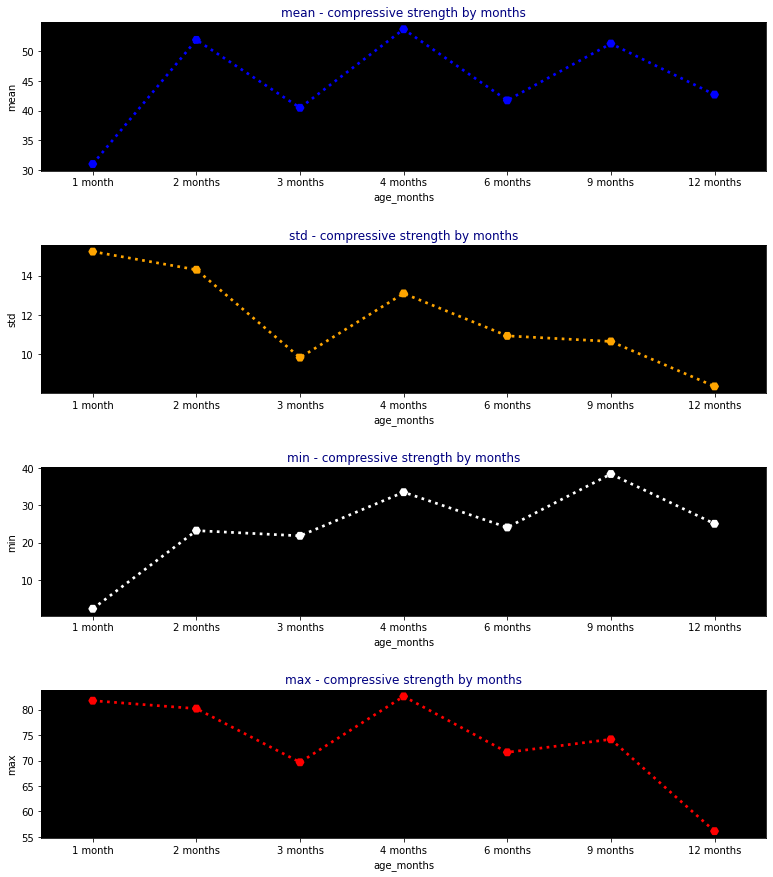

In [76]:
#Compressive strength by months
age_mon = data_age.groupby("age_months")["strength"].describe().reset_index()

order  = ['1 month','2 months', '3 months','4 months','6 months','9 months', '12 months']
cols   = [ 'mean', 'std' , 'min' , 'max']
length = len(cols)
cs     = ["b","orange","white","r"] 

fig = plt.figure(figsize=(13,15))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,1,j+1)
    ax = sns.pointplot("age_months",i,data=age_mon,
                       order=order,
                       markers="H",
                       linestyles="dotted",color=k)
    plt.subplots_adjust(hspace=.5)
    ax.set_facecolor("k")
    plt.title(i+" - compressive strength by months",color="navy")

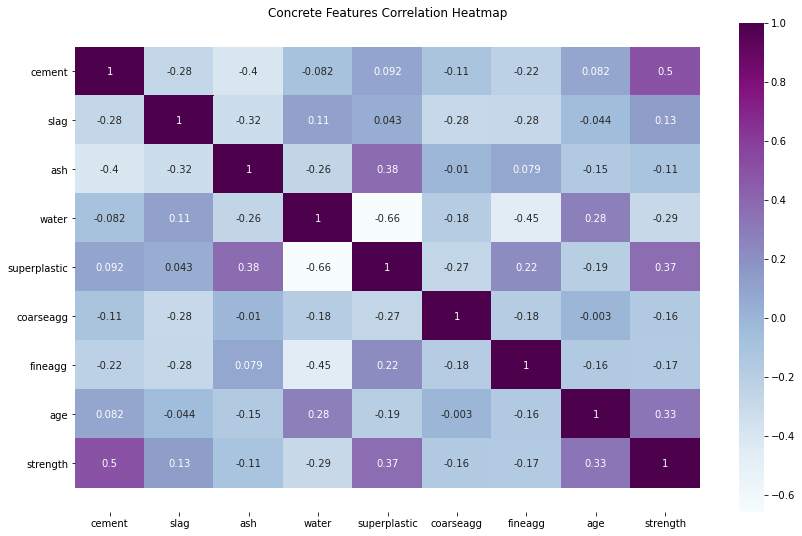

In [41]:
# Validation of the pair-plot and scatter plot views via Pair-wise Pearson Correlations
fig = plt.figure(figsize=(14,9))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap="BuPu", linecolor="black")
b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)

plt.title("Concrete Features Correlation Heatmap")
plt.show()

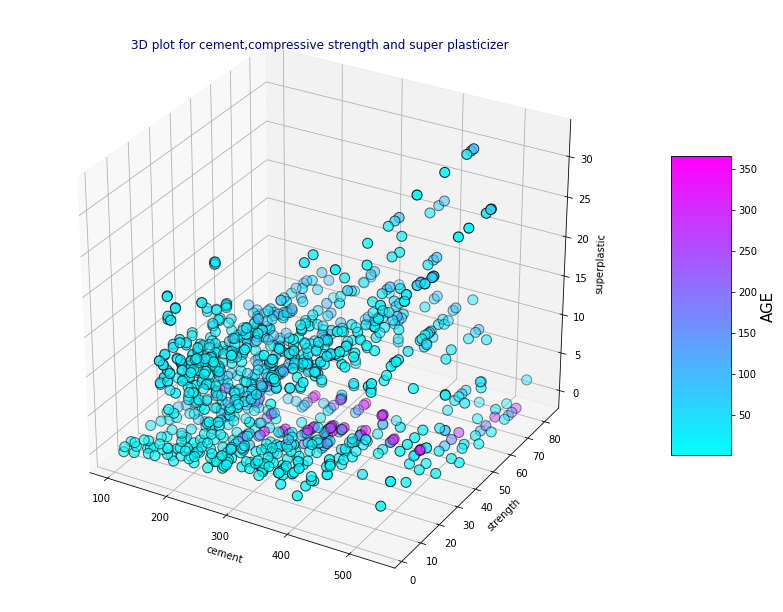

In [43]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14,11))

ax  = fig.gca(projection = "3d")
#plt.subplot(111,projection = "3d") 

plot =  ax.scatter(data["cement"],
           data["strength"],
           data["superplastic"],
           linewidth=1,edgecolor ="k",
           c=data["age"],s=100,cmap="cool")

ax.set_xlabel("cement")
ax.set_ylabel("strength")
ax.set_zlabel("superplastic")

lab = fig.colorbar(plot,shrink=.5,aspect=5)
lab.set_label("AGE",fontsize = 15)

plt.title("3D plot for cement,compressive strength and super plasticizer",color="navy")
plt.show()

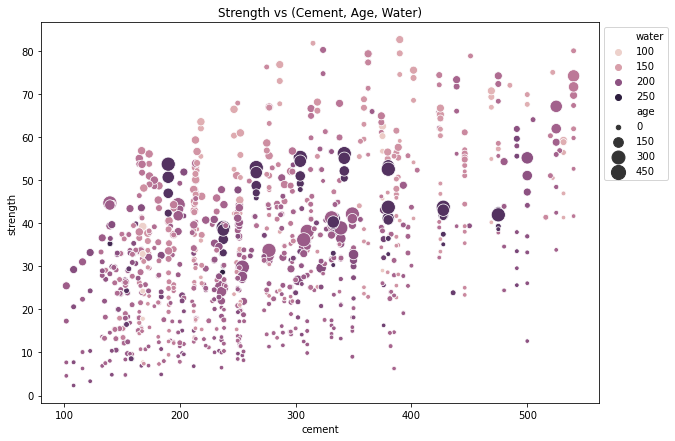

In [45]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="strength", x="cement", hue="water", size="age", data=data, ax=ax, sizes=(20, 200))
ax.set_title("Strength vs (Cement, Age, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

### Observations 3. after Bivariate - Multivariate Analysis

**Diagonals Analysis**

1. cement attribute have almost normal curve.
2. slag has two gausssians and rightly skewed.It shows the presence of outlies.
3. ash has two gaussians and rightly skewed.It shows the presence of outlies.
4. water has atleast guassians and slighly left skewed.It shows the presence of outlies.
5. superplastic has multiple gaussians and rightly skewed.It shows the presence of outlies.
6. coarseagg has three guassians and almost normal.
7. fineagg has almost two guassians and looks like normal.
8. age has multiple guassians and rightly skewed. It shows the presence of outlies.
9. strength is close to a normal curve.
10. We not only have missing values problem but also outliers problem in the dataset.<br>

**Off Diagonal Analysis: Relationship between attributes**

Pearson Correlation, Scatter plots, 3D-Plots ..

We can observe a high positive correlation between Concrete's Compressive Strength and Cement. This is true as it well established that strength of concrete increases as the amount of cement used in the composite during preparation increases.<br>
Also, Age and Super Plasticizer (superplastic) are the other two factors influencing Compressive strength of the concrete. More specifically:<br>
* Cement vs other independent attributes: This attribute does not have any significant relation with slag, ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
* Water vs other independent attributes: This attribute have significant negative linear relationship with superplastic and fineagg. This is true as Superplasticizers allows the reduction of water in the concrete upto the extent of 30% without reducing the workability. It does not have any significant relationship with other independent atributes but It also shows some kind of positive relationship with slag and age. 
* Blust furnace Slag vs other independent attributes: This attribute also does not have any significant relation with ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
* Fly-Ash vs other independent attributes: This attribute also does not have any significant relation with water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
* Super-plasticizer vs other independent attributes: This attribute have negative linear relationship with water only. It does not have any significant relationship with other independent attributes but has positive correlations between Super Plasticizer and Fly Ash, Fine Aggregate.
* Coarse-Aggragate vs other independent attributes:This attribute also does not have any significant relation with any other attributes. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
* Fine-Aggregate vs other independent attributes:It has negative linear relationship with water. It does not have any significant relation with any other attributes. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.

#### The observations 4. 
from plots of Strength vs Age_Monts,<br> 
              Strength vs Cement Water, Age,<br>
              Strength vs Super Plasticizer and Cement<br>

* Compressive strength increases as the amount of cement increases, as the dots move up when we move towards right on the x-axis.
* Compressive strength increases with age (as the size of dots represents the age), this not the case always but can be up to an extent.
* Cement with less age requires more cement for higher strength, as the smaller dots are moving up when we move towards right on the x-axis.
* The older the cement is the more water it requires, can be confirmed by observing the colour of the dots. Larger dots with dark colour indicate high age and more water.
* Concrete strength increases when less water is used in preparing it since the dots on the lower side (y-axis) are darker and the dots on higher-end (y-axis) are brighter.



### Feature Engineering Techniques

a. Identify opportunities (if any) to extract a new feature from existing features, drop a feature (if required)
b. Get data model ready and do a train test split.
c. Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree.

K-Means clustering<br>
Treatment of outliers<br>
Add new features<br>


The reason why we are doing the Analysis so far and followed by Feature Engineering is mainly to find any kind of dimensions/attributes which are very strongly correlated i.e. r value close to 1 or -1. Such corelated features don't improve models but they can affect specific models in different ways and to varying extents:

For linear models (e.g., linear regression or logistic regression), multicolinearity can yield solutions that are wildly varying and possibly numerically unstable.
Random forests can be good at detecting interactions between different features, but highly correlated features can mask these interactions. are giving same information to your algorithms, its a redundant dimension. So in such cases we may want to keep one and drop the other. Which we should keep and which we should drop depends on again your domain expertise, which one of the dimension is more prone to errors.I would like to drop that dimension. Or we have a choice to combine these dimensions and create a composite dimension out of it.
For the above mentioned reasons we will use K-Means Clustering to find which Features we may drop.

#### K-Means clustering¶

The slow "standard algorithm" for k-means clustering, and its associated expectation-maximization algorithm, is a special case of a Gaussian mixture model, specifically, the limiting case when fixing all covariances to be diagonal, equal and have infinitesimal small variance. Instead of small variances, a hard cluster assignment can also be used to show another equivalence of k-means clustering to a special case of "hard" Gaussian mixture modelling.[52](11.4.2.5) 

In [77]:
from sklearn.cluster import KMeans

# Create a copy of the data
data_copy = data.copy(deep=True)
tmp_df = data_copy[['ash', 'superplastic', 'slag']]

cluster_range = range( 2, 15 ) 
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(tmp_df)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,5168371.838
1,3,2869575.562
2,4,1759377.572
3,5,1038830.148
4,6,802913.863
5,7,608033.279
6,8,541819.322
7,9,419287.922
8,10,365027.788
9,11,308190.532


In [78]:
from sklearn.cluster import KMeans
from scipy.stats import zscore

tmp_df_z = tmp_df.apply(zscore)

cluster = KMeans( n_clusters = 5, random_state = 2354 )
cluster.fit(tmp_df_z)

prediction=cluster.predict(tmp_df_z)
data_copy["group"] = prediction 

In [79]:
data_copy.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,group
0,141.300,212.000,0.000,203.500,0.000,971.800,748.500,28,29.890,1
1,168.900,42.200,124.300,158.300,10.800,1080.800,796.200,14,23.510,0
2,250.000,0.000,95.700,187.400,5.500,956.900,861.200,28,29.220,0
3,266.000,114.000,0.000,228.000,0.000,932.000,670.000,28,45.850,1
4,154.800,183.400,0.000,193.300,9.100,1047.400,696.700,28,18.290,4
5,255.000,0.000,0.000,192.000,0.000,889.800,945.000,90,21.860,2
6,166.800,250.200,0.000,203.500,0.000,975.600,692.600,7,15.750,1
7,251.400,0.000,118.300,188.500,6.400,1028.400,757.700,56,36.640,0
8,296.000,0.000,0.000,192.000,0.000,1085.000,765.000,28,21.650,2
9,155.000,184.000,143.000,194.000,9.000,880.000,699.000,28,28.990,3


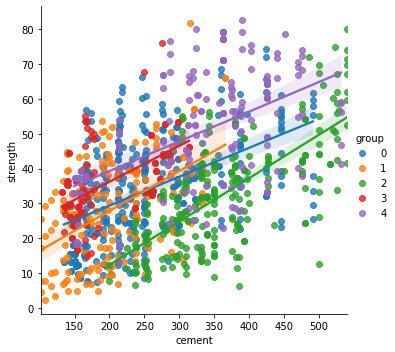

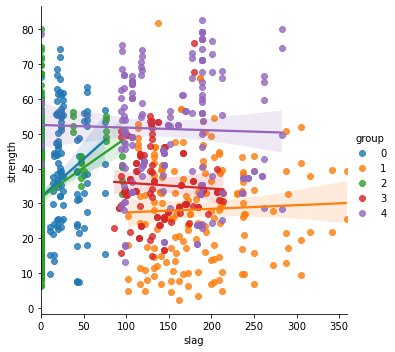

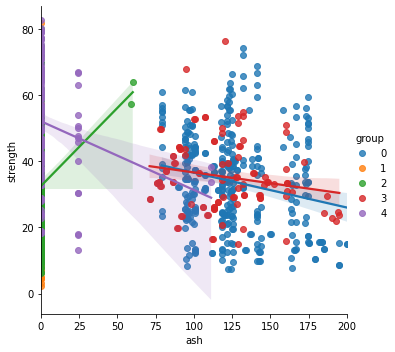

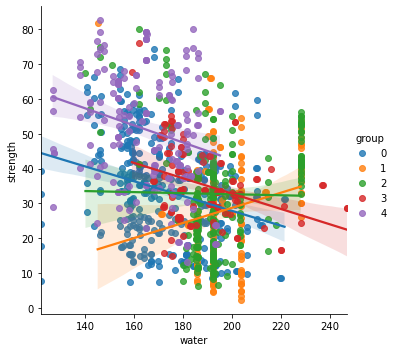

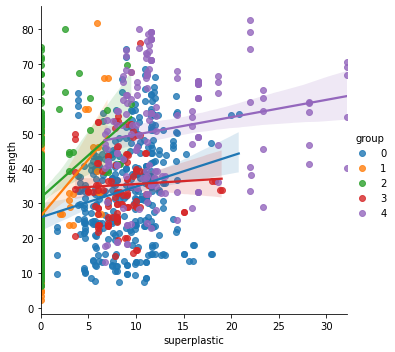

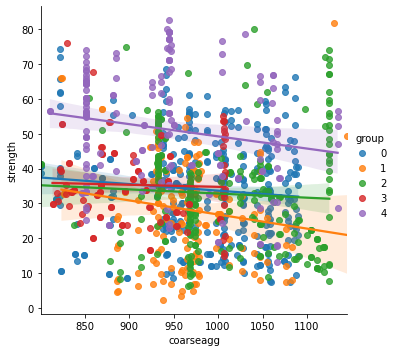

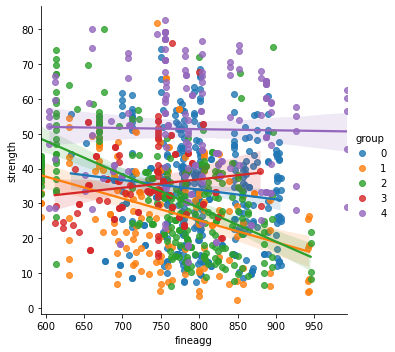

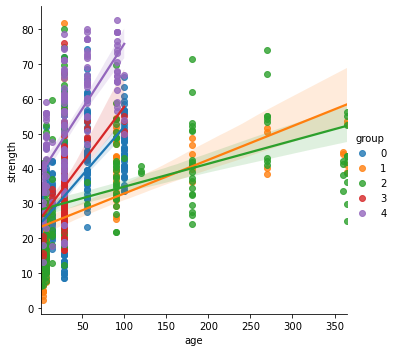

In [80]:
for col in data_copy.columns[:-2]:
    sns.lmplot(data=data_copy, x=col, y='strength', hue='group')



#### Observations from K-Means Clustering

From the above analysis, it can be seen that

<b> * Water, superplastic, age and cement are the most important attributes for Concrete Strength prediction.<br>
<b> * Ash, Coarseagg and Fineagg are not strong predictors. Thus we can try to remove(drop) them in order to increase the performance of our ML Model.<br>
<b> * Slag is mildly important predictor

#### Feature engineering 2
Opportunities (if any) to extract a new feature<br>
<b>Water to Cement ratio</b><br>
A key factor in concrete engineering is the water-cement ratio so we can create this feature to evaluate it in new dataset named 'data_wcratio'.

In [81]:
# pure water-cement ratio feature
data_wcratio = data.copy()
data_wcratio.insert(data_wcratio.shape[-1]-1,'water-cement-ratio', data_wcratio['water']/data_wcratio['cement'])
data_wcratio.drop(['water', 'cement'], axis=1, inplace=True)

# scale it!
scaler = MaxAbsScaler()
data_wcratio_scaled = data_wcratio.copy()
data_wcratio_sc = scaler.fit_transform(data_wcratio)
data_wcratio_scaled.loc[:,:] = data_wcratio_sc

# making the scaling function more accessible
extract_scaling_function = np.ones((1,data_wcratio.shape[1]))
extract_scaling_function = scaler.inverse_transform(extract_scaling_function)

# split data into X and y
y_df = data_wcratio_scaled['strength'].copy()
X_df = data_wcratio_scaled.copy()
X_df.drop('strength', axis=1, inplace=True)

# add it to the dict of datasets for fast and iterative testing
X_train, X_test, y_train, y_test = train_test_split(X_df.values, y_df.values,test_size=0.2, random_state=42, shuffle=True)
comment = 'pure water-cement-ratio; 8 inputs, 1 output'
#dataset[dataset_id] = {'X_train': X_train, 'X_test' : X_test, 'y_train': y_train, 'y_test' : y_test, 'scaler' : scaler, 'scaler_array' : extract_scaling_function, 'comment' : comment, 'dataset' : dataset_id}
#dataset_id += 1

data_wcratio['water-cement-ratio'].head()

0   1.440
1   0.937
2   0.750
3   0.857
4   1.249
Name: water-cement-ratio, dtype: float64

In [82]:
data_wcratio.head()

,slag,ash,superplastic,coarseagg,fineagg,age,water-cement-ratio,strength
0,212.000,0.000,0.000,971.800,748.500,28,1.440,29.890
1,42.200,124.300,10.800,1080.800,796.200,14,0.937,23.510
2,0.000,95.700,5.500,956.900,861.200,28,0.750,29.220
3,114.000,0.000,0.000,932.000,670.000,28,0.857,45.850
4,183.400,0.000,9.100,1047.400,696.700,28,1.249,18.290


#### Feature engineering 3
<b> Water to binder ratio</b><br>
Depending on the definition we could count fly ash and slag as binder as well. Usually they are weighted with k-values which we do not have. Hence, we have to try without them, so we can create this feature to evaluate it in new dataset named 'data_ratios_full'.

In [83]:
data_ratios_full = data.copy()
data_ratios_full.insert(data_ratios_full.shape[-1]-1,'water-cement-ratio_with_slag_ash',data_ratios_full['water']/(data_ratios_full['cement'] + data_ratios_full['ash'] + data_ratios_full['slag']))
data_ratios_full.drop(['water', 'cement', 'ash', 'slag'], axis=1, inplace=True)

scaler = MaxAbsScaler()
data_ratios_full_scaled = data_ratios_full.copy()
data_ratios_full_sc = scaler.fit_transform(data_ratios_full)
data_ratios_full_scaled.loc[:,:] = data_ratios_full_sc
extract_scaling_function = np.ones((1,data_ratios_full.shape[1]))
extract_scaling_function = scaler.inverse_transform(extract_scaling_function)

# split data into X and y
y_df = data_ratios_full_scaled['strength'].copy()
X_df = data_ratios_full_scaled.copy()
X_df.drop('strength', axis=1, inplace=True)


X_train, X_test, y_train, y_test = train_test_split(X_df.values, y_df.values,test_size=0.2, random_state=42, shuffle=True)
data_ratios_full['water-cement-ratio_with_slag_ash'].head()

0   0.576
1   0.472
2   0.542
3   0.600
4   0.572
Name: water-cement-ratio_with_slag_ash, dtype: float64

In [84]:
data_ratios_full = data.copy()
data_ratios_full.insert(data_ratios_full.shape[-1]-1,'water-cement-ratio_with_slag_ash',data_ratios_full['water']/(data_ratios_full['cement'] + data_ratios_full['ash'] + data_ratios_full['slag']))
data_ratios_full.drop(['water', 'cement', 'ash', 'slag'], axis=1, inplace=True)

data_ratios_full['water-cement-ratio_with_slag_ash'].head()

0   0.576
1   0.472
2   0.542
3   0.600
4   0.572
Name: water-cement-ratio_with_slag_ash, dtype: float64

In [85]:
data_ratios_full.head()

,superplastic,coarseagg,fineagg,age,water-cement-ratio_with_slag_ash,strength
0,0.000,971.800,748.500,28,0.576,29.890
1,10.800,1080.800,796.200,14,0.472,23.510
2,5.500,956.900,861.200,28,0.542,29.220
3,0.000,932.000,670.000,28,0.600,45.850
4,9.100,1047.400,696.700,28,0.572,18.290


#### Feature engineering 4
Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree help<br>

As provided in the dataset information the strength of the concrete is a highly nonlinear function of age and ingredients.
With few weak exemptions attributes does not give any strong relationship with strength. Hence, we can see that none of the independent attributes are a good predictors of the strength attribute. There is a no linear relationship between them.

Thus using a simple linear model won't help in this problem to get better modeling accuracy. Use of quadratic and higher degree makes sense in this case to incorporate the nonlinear relationship between target and independent attributes

In order to incorporate the non-linear feature interaction among independent features we choose to add polynomial features in our models with degree 2 or 3.


#### Feature engineering 5
##### Treatment of outliers
Replace outliers with their attribute respective Median and run the models to evaluate the relative behavior.

### Creating the model and tuning it

We will try the following algorithms:
1. Linear Regression
2. Linear Regression with Polynomial features of degree 2
3. Linear Regression with Polynomial features of degree 3
4. Ridge 
5. Ridge with polynomial features of degree 2
6. Ridge with polynomial features of degree 3
7. Lasso 
8. Lasso with polynomial features of degree 2
9. Lasso with polynomial features of degree 3
10. Decision Trees
11. Random forest
12. Ada boosting
13. Gradient boosting
14. KNN
15. Support Vector machines

We will always scale the data as confirmed in EDA

we will perform the analysis in following iterations
1. Build the models and perform analysis on all data
2. Treat outliers and build models again
3. Consider the results of Feature engineering (k-means clustering)
4. Discuss and compare all the results

In [107]:
data = pd.read_csv('concrete.csv')

In [99]:
# Helper classes
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.impute import SimpleImputer

import pandas as pd
import numpy as np

class Regressor(object):
    """
    Class representing a regressor. 
    Based on the parameters supplied in the constructor, this class constructs a pipeline object.
    The constructed pipeline adds 
    - Standard scalar if the scale parameter is passed as True
    - Polynomial Feature transformations if the include_polymomial flag is set as True
    """
    def __init__(self, name, model, scale=True, include_polynomial=True, degree=2):
        self.name = name
        self.model = model
        steps = []
        if scale:
            steps.append(('scaler', StandardScaler()))
        if include_polynomial:
            steps.append(('poly_features', PolynomialFeatures(degree=degree)))
        steps.append(('model', model))
        self.steps = steps

    def get_name(self):
        return self.name

    def get_model(self):
        return self.model

    def get(self):
        return Pipeline(steps=self.steps)

    def feature_imp(self):
        try:
            return self.model.feature_importances_
        except AttributeError:
            try:
                return self.model.coef_
            except AttributeError:
                return None


class ModelsBuilder(object):
    '''
    This class is responsible for building the model and constructing a results dataframe.
    It accepts several regressor objects.
    '''
    def __init__(self, regressors, data, target, test_size=0.3, seed=42):
        self.regressors = regressors
        self.split_data = train_test_split(data.drop(target, axis=1), data[target], test_size=test_size, random_state=seed)
        self.data = data
        self.target = target

    def build(self, k_fold_splits=10):
        results = pd.DataFrame(columns=['model', 'training_score', 'test_score', 'k_fold_mean', 'k_fold_std', 'MSE'])
        for regressor in self.regressors:
            regressor.get().fit(self.split_data[0], self.split_data[2])
            cross_vals = cross_val_score(regressor.get(), self.data.drop(self.target, axis=1), self.data[self.target], cv=KFold(n_splits=k_fold_splits))
            mean = round(cross_vals.mean(), 3)
            std = round(cross_vals.std(), 3)
            results = results.append({
                'model': regressor.get_name(),
                'training_score': round(regressor.get().score(self.split_data[0], self.split_data[2]), 3),
                'test_score': round(regressor.get().score(self.split_data[1], self.split_data[3]),3), 
                'k_fold_mean': mean, 
                'k_fold_std': std,
                #'MSE': mean_squared_error('y_true', 'y_pred'),
                '95% confidence intervals': str(round(mean-(1.96*std),3)) + ' <-> ' + str(round(mean+(1.96*std),3))
                }, ignore_index=True)

        return results


class OutliersImputer(SimpleImputer):
    '''
    This class extends the functionality of SimpleImputer to handle outliers.
    '''
    def __init__(self, strategy='mean'):
        self.strategy = strategy
        super().__init__(strategy=strategy)

    def fit(self, X, y=None):
        for i in X.columns:
            q1, q2, q3 = X[i].quantile([0.25,0.5,0.75])
            IQR = q3 - q1
            a = X[i] > q3 + 1.5*IQR
            b = X[i] < q1 - 1.5*IQR
            X[i] = np.where(a | b, np.NaN, X[i])  
        return super().fit(X, y)

In [100]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

regressors = [
    Regressor('Linear Regression', LinearRegression(), scale=True), 
    Regressor('Linear Regression degree 2', LinearRegression(), 
              scale=True, include_polynomial=True, degree=2),
    Regressor('Linear Regression degree 3', LinearRegression(), 
              scale=True, include_polynomial=True, degree=3), 
    Regressor('Ridge', Ridge(random_state=42), scale=True), 
    Regressor('Ridge degree 2', Ridge(random_state=42), 
              scale=True, include_polynomial=True, degree=2),
    Regressor('Ridge degree 3', Ridge(random_state=42), 
              scale=True, include_polynomial=True, degree=3),
    Regressor('Lasso', Lasso(random_state=42), scale=True), 
    Regressor('Lasso degree 2', Lasso(random_state=42), 
              scale=True, include_polynomial=True, degree=2),
    Regressor('Lasso degree 3', Lasso(random_state=42), 
              scale=True, include_polynomial=True, degree=3), 
    Regressor('Decision Tree', DecisionTreeRegressor(random_state=42, max_depth=4), scale=True),
    Regressor('Ada boosting', AdaBoostRegressor(random_state=42), scale=True),
    Regressor('Random forest', RandomForestRegressor(random_state=42, max_depth=4), scale=True),
    Regressor('Gradient boosting', GradientBoostingRegressor(random_state=42, max_depth=4), scale=True),
    Regressor('KNN', KNeighborsRegressor(n_neighbors=3), scale=True),
    Regressor('SVR', SVR(gamma='auto'), scale=True),
]

In [101]:
# Iteration 1 - Use all data
result = ModelsBuilder(regressors, data, 'strength').build()
tmp_best = result.sort_values(['k_fold_mean'], ascending=False).head(1)
tmp_best['model'] = 'Best Model = ' + tmp_best['model']
result = result.append(tmp_best, ignore_index=True)
result

,model,training_score,test_score,k_fold_mean,k_fold_std,MSE,95% confidence intervals
0,Linear Regression,0.827,0.744,0.778,0.043,nan,0.694 <-> 0.862
1,Linear Regression degree 2,0.827,0.744,0.778,0.043,nan,0.694 <-> 0.862
2,Linear Regression degree 3,0.935,0.786,0.850,0.047,nan,0.758 <-> 0.942
3,Ridge,0.827,0.741,0.777,0.044,nan,0.691 <-> 0.863
4,Ridge degree 2,0.827,0.741,0.777,0.044,nan,0.691 <-> 0.863
5,Ridge degree 3,0.929,0.860,0.863,0.040,nan,0.785 <-> 0.941
6,Lasso,0.725,0.688,0.690,0.042,nan,0.608 <-> 0.772
7,Lasso degree 2,0.725,0.688,0.690,0.042,nan,0.608 <-> 0.772
8,Lasso degree 3,0.741,0.670,0.694,0.043,nan,0.61 <-> 0.778
9,Decision Tree,0.732,0.661,0.660,0.049,nan,0.564 <-> 0.756


In [108]:
# Iteration 2 - Ouliers treatment

# Count outliers
q1= data.quantile(0.25)
q3= data.quantile(0.75)
IQR = q3-q1
outliers = pd.DataFrame(((data > (q3+1.5*IQR)) | (data < (q1-IQR*1.5))).sum(axis=0), columns=['No. of outliers'])
outliers['Percentage of outliers'] = round(outliers['No. of outliers']*100/len(data), 2)
outliers

,No. of outliers,Percentage of outliers
cement,0,0.000
slag,2,0.190
ash,0,0.000
water,9,0.870
superplastic,10,0.970
coarseagg,0,0.000
fineagg,5,0.490
age,59,5.730
strength,4,0.390


In [109]:
data[['age','superplastic']] = OutliersImputer().fit_transform(data[['age','superplastic']])

In [104]:
# let us remove the outliers
for column in data.columns.tolist():
    Q1 = data[column].quantile(.25) # 1st quartile
    Q3 = data[column].quantile(.75) # 3rd quartile
    IQR = Q3-Q1 # get inter quartile range
    # Replace elements of columns that fall below Q1-1.5*IQR and above Q3+1.5*IQR
    data[column].replace(data.loc[(data[column] > Q3+1.5*IQR)|(data[column] < Q1-1.5*IQR), column], data[column].median(),inplace=True)

In [110]:
# Count outliers
q1= data.quantile(0.25)
q3= data.quantile(0.75)
IQR = q3-q1
outliers = pd.DataFrame(((data > (q3+1.5*IQR)) | (data < (q1-IQR*1.5))).sum(axis=0), columns=['No. of outliers'])
outliers['Percentage of outliers'] = round(outliers['No. of outliers']*100/len(data), 2)
outliers

,No. of outliers,Percentage of outliers
cement,0,0.000
slag,2,0.190
ash,0,0.000
water,9,0.870
superplastic,0,0.000
coarseagg,0,0.000
fineagg,5,0.490
age,131,12.720
strength,4,0.390


In [111]:
result_outliers_treatment = ModelsBuilder(regressors, data, 'strength').build()
tmp_best = result_outliers_treatment.sort_values(['k_fold_mean'], ascending=False).head(1)
tmp_best['model'] = 'Best Model = ' + tmp_best['model']
result_outliers_treatment = result_outliers_treatment.append(tmp_best, ignore_index=True)
result_outliers_treatment

,model,training_score,test_score,k_fold_mean,k_fold_std,MSE,95% confidence intervals
0,Linear Regression,0.871,0.836,0.843,0.026,nan,0.792 <-> 0.894
1,Linear Regression degree 2,0.871,0.836,0.843,0.026,nan,0.792 <-> 0.894
2,Linear Regression degree 3,0.947,0.829,0.878,0.036,nan,0.807 <-> 0.949
3,Ridge,0.870,0.836,0.843,0.026,nan,0.792 <-> 0.894
4,Ridge degree 2,0.870,0.836,0.843,0.026,nan,0.792 <-> 0.894
5,Ridge degree 3,0.941,0.872,0.885,0.025,nan,0.836 <-> 0.934
6,Lasso,0.772,0.761,0.754,0.029,nan,0.697 <-> 0.811
7,Lasso degree 2,0.772,0.761,0.754,0.029,nan,0.697 <-> 0.811
8,Lasso degree 3,0.794,0.752,0.763,0.028,nan,0.708 <-> 0.818
9,Decision Tree,0.740,0.667,0.684,0.054,nan,0.578 <-> 0.79


In [112]:
# Iteration 3 - Remove features based on k-means clustering
result_feature_engg = ModelsBuilder(regressors, data.drop(['ash','coarseagg', 'fineagg'], axis=1), 'strength').build()
tmp_best = result_feature_engg.sort_values(['k_fold_mean'], ascending=False).head(1)
tmp_best['model'] = 'Best Model = ' + tmp_best['model']
result_feature_engg = result_feature_engg.append(tmp_best, ignore_index=True)
result_feature_engg

,model,training_score,test_score,k_fold_mean,k_fold_std,MSE,95% confidence intervals
0,Linear Regression,0.832,0.796,0.808,0.026,nan,0.757 <-> 0.859
1,Linear Regression degree 2,0.832,0.796,0.808,0.026,nan,0.757 <-> 0.859
2,Linear Regression degree 3,0.885,0.847,0.850,0.032,nan,0.787 <-> 0.913
3,Ridge,0.832,0.796,0.809,0.026,nan,0.758 <-> 0.86
4,Ridge degree 2,0.832,0.796,0.809,0.026,nan,0.758 <-> 0.86
5,Ridge degree 3,0.885,0.846,0.851,0.032,nan,0.788 <-> 0.914
6,Lasso,0.771,0.761,0.754,0.028,nan,0.699 <-> 0.809
7,Lasso degree 2,0.771,0.761,0.754,0.028,nan,0.699 <-> 0.809
8,Lasso degree 3,0.783,0.750,0.758,0.032,nan,0.695 <-> 0.821
9,Decision Tree,0.740,0.681,0.694,0.054,nan,0.588 <-> 0.8


In [113]:
# Iteration 5 - Use the dataset 'data_wcratio'
result = ModelsBuilder(regressors, data_wcratio, 'strength').build()
tmp_best = result.sort_values(['k_fold_mean'], ascending=False).head(1)
tmp_best['model'] = 'Best Model = ' + tmp_best['model']
result = result.append(tmp_best, ignore_index=True)
result

,model,training_score,test_score,k_fold_mean,k_fold_std,MSE,95% confidence intervals
0,Linear Regression,0.812,0.716,0.757,0.052,nan,0.655 <-> 0.859
1,Linear Regression degree 2,0.812,0.716,0.757,0.052,nan,0.655 <-> 0.859
2,Linear Regression degree 3,0.908,0.845,0.853,0.031,nan,0.792 <-> 0.914
3,Ridge,0.812,0.717,0.758,0.051,nan,0.658 <-> 0.858
4,Ridge degree 2,0.812,0.717,0.758,0.051,nan,0.658 <-> 0.858
5,Ridge degree 3,0.907,0.849,0.856,0.031,nan,0.795 <-> 0.917
6,Lasso,0.706,0.667,0.675,0.044,nan,0.589 <-> 0.761
7,Lasso degree 2,0.706,0.667,0.675,0.044,nan,0.589 <-> 0.761
8,Lasso degree 3,0.715,0.660,0.677,0.047,nan,0.585 <-> 0.769
9,Decision Tree,0.752,0.716,0.710,0.048,nan,0.616 <-> 0.804


In [114]:
# Iteration 6 - Use the dataset 'data_ratios_full'
result = ModelsBuilder(regressors, data_ratios_full, 'strength').build()
tmp_best = result.sort_values(['k_fold_mean'], ascending=False).head(1)
tmp_best['model'] = 'Best Model = ' + tmp_best['model']
result = result.append(tmp_best, ignore_index=True)
result

,model,training_score,test_score,k_fold_mean,k_fold_std,MSE,95% confidence intervals
0,Linear Regression,0.763,0.690,0.718,0.049,nan,0.622 <-> 0.814
1,Linear Regression degree 2,0.763,0.690,0.718,0.049,nan,0.622 <-> 0.814
2,Linear Regression degree 3,0.848,0.795,0.809,0.031,nan,0.748 <-> 0.87
3,Ridge,0.763,0.691,0.718,0.048,nan,0.624 <-> 0.812
4,Ridge degree 2,0.763,0.691,0.718,0.048,nan,0.624 <-> 0.812
5,Ridge degree 3,0.848,0.795,0.810,0.031,nan,0.749 <-> 0.871
6,Lasso,0.705,0.667,0.676,0.043,nan,0.592 <-> 0.76
7,Lasso degree 2,0.705,0.667,0.676,0.043,nan,0.592 <-> 0.76
8,Lasso degree 3,0.708,0.668,0.676,0.044,nan,0.59 <-> 0.762
9,Decision Tree,0.818,0.732,0.763,0.040,nan,0.685 <-> 0.841


### Creating the model and tuning it 2.
Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit¶
We will make use of GridSearchCV and RandomSearchCV functions to find the best model parameters by tuning the hyper parameters

In [119]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(['ash', 'coarseagg', 'fineagg', 'strength'], axis=1), 
                                                   data['strength'], 
                                                   test_size = 0.2, 
                                                   random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((824, 5), (206, 5), (824,), (206,))

In [120]:
# Prepare parameter grid
param_grid = {
    'criterion': ['mse', 'mae', 'friedman_mse'], 
    'learning_rate': [0.05, 0.1, 0.15, 0.2], 
    'max_depth': [2, 3, 4, 5], 
    'max_features': ['sqrt', None], 
    'max_leaf_nodes': list(range(2, 10)),
    'n_estimators': list(range(50, 500, 50)),
    'subsample': [0.8, 0.9, 1.0]
}

In [121]:
# Perform hyper parameter tuning using GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

rs = RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_distributions=param_grid, 
                 return_train_score= True, n_jobs=-1, verbose=2, cv = 10, n_iter=500)
rs.fit(X_train, y_train)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1530 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 2057 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 2664 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 3385 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 4178 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  8.4min finished


RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae',
                                                      'friedman_mse'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 4, 5],
                                        'max_features': ['sqrt', None],
                                        'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8,
                                                           9],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450],
                                        'subsample': [0.8, 0.9, 1.0]},
                   return_train_score=True, verbose=2)

In [123]:
mean = rs.best_score_
std = rs.cv_results_['mean_test_score'].std()

print(f"Mean training score: {rs.cv_results_['mean_train_score'].mean()}")
print(f"Mean validation score: {mean}")
print(f"Validation standard deviation: {std}")
print(f"95% confidence interval: {str(round(mean-(1.96*std),3)) + ' <-> ' + str(round(mean+(1.96*std),3))}")
print(f"Best parameters: {rs.best_params_}")
print(f"Test score: {rs.score(X_test, y_test)}")

Mean training score: 0.9249701280809722
Mean validation score: 0.9311728200360607
Validation standard deviation: 0.05305340755018018
95% confidence interval: 0.827 <-> 1.035
Best parameters: {'subsample': 0.8, 'n_estimators': 450, 'max_leaf_nodes': 8, 'max_features': 'sqrt', 'max_depth': 4, 'learning_rate': 0.15, 'criterion': 'friedman_mse'}
Test score: 0.9318928305814311


### References

Abrams, L. D. (1919). "Properties of concrete", 3rd edition, Pitman Publishing LTD, London.<br>
Chang, T.-P., Chung, F.-C. , and Lin, H.-C. (1996). “A mix proportioning methodology for high-performance concrete.” J. Chin. Inst. Eng., 19(6),645–655.<br>
Yeh, I.-C. (1998). “Modeling of strength of high performance concrete using artificial neural networks.” Cem. Concr. Res., 28(12), 1797–1808.<br>
Klieger, Paul (1958). "Effect of Mixing and Curing Temperature on Concrete Stregth", Research and Developement Laboratories of the Portland Cement Association, Bulletin 103, Chicago.<br>
The Portland Cement Association (PCA) https://www.cement.org/
.


#### Literature Review on the Case Study

https://www.kaggle.com/pavanraj159/predicting-compressive-strength-of-concrete<br>
https://www.kaggle.com/saurav9786/featurization-model-selection-and-tuning-tutorial<br>
https://www.kaggle.com/shrikantchine/concrete-strength-prediction<br>
https://www.kaggle.com/pranaymns/predicting-concrete-compressive-strength-with-ml<br>
https://miro.medium.com/max/2859/1*LQg3g36bTRx0ZNytVWm5nA.jpeg<br>
https://github.com/swethalahari/Determining-Concrete-Strength/blob/a545244ba9bb7bbda2319f72c1b816561e7a3809/Feature_Engg-Copy1-1-checkpoint.ipynb<br>
https://www.kaggle.com/shrishailgajbhar/predict-concrete-strength-scikit-learn-pipeline<br>
https://www.simonwenkel.com/2018/08/08/revisiting_ml_datasets_concrete_compressive_strength.html<br>
https://www.kaggle.com/kevinscaria/predict-compressive-strength-of-concrete<br>
https://stackoverflow.com/questions/51087098/impute-missing-and-outlier-values-as-median-excluding-the-outliers-from-the-cal<br>
https://realpython.com/k-means-clustering-python/<br>
https://scikit-learn.org/stable/modules/preprocessing.html<br>


